# Data Cleaning 
## Criteria for "Low Quality" images:
  1. blurry images
  2. low resolution images
  3. images with lost of noise and artifacts

## Detecting Blurry Images
The variance of the Laplacian is used to detect blurry images. The Laplacian operator is used to highlight regions of an image where there is a rapid intensity change typically corresponds to edges. A blurry image will have fewer edges and hence a lower variance of the Laplacian. 
  - A threshold of 100 is used to compare with Laplacian variance to detect blurry images. An image is considered blurry if $image\_variance < threshold$.

## Outline 
  - [1. Import libraries](#1)
  - [2. Initialisation](#2)
  - [3. Visualization](#3)
    - [3.1. Random images](#3.1)
    - [3.2. Blurry images](#3.2)

<a name="1"></a>
### 1. Import libraries 

In [21]:
import os
import sys 
import importlib
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
import data_clean as dc
import visualization


<a name="2"></a>
### 2. Initialisation

In [22]:
dataset_path = "/home/norakami/age-prediction/dataset"
threshold = 100.0

<a name="3"></a>
### 3. Image Visualization

<a name="3.1"></a>
#### 3.1. Visualization of Random Images 

![alt-text](/home/norakami/age-prediction/pics/sample_images.png)

<a name="3.2"></a>
#### 3.2. Visualization of Blurry Images 

In [23]:
blurry_images, sharp_images = dc.get_blurry_sharp_files(dataset_path, threshold)

In [24]:
importlib.reload(visualization)
print(f"Blurry images len: {len(blurry_images)},\nSharp Images len: {len(sharp_images)}")
# visualization.save_blurry_sharp_pics(dataset_path, blurry_images, sharp_images)

Blurry images len: 646,
Sharp Images len: 29324


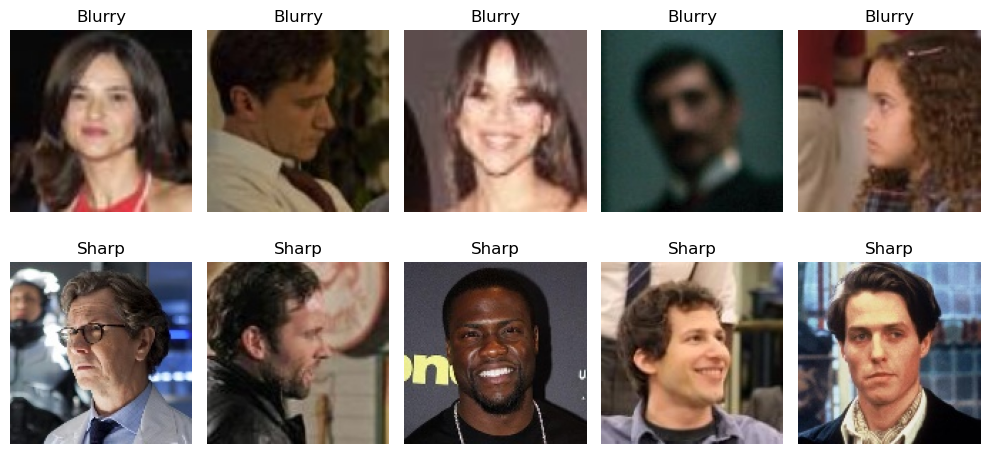

In [25]:
visualization.show_blurry_sharp_pics(dataset_path, blurry_images, sharp_images)